In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load data
df = pd.read_csv("insurance.csv")
print(df.head())
print(df.info())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


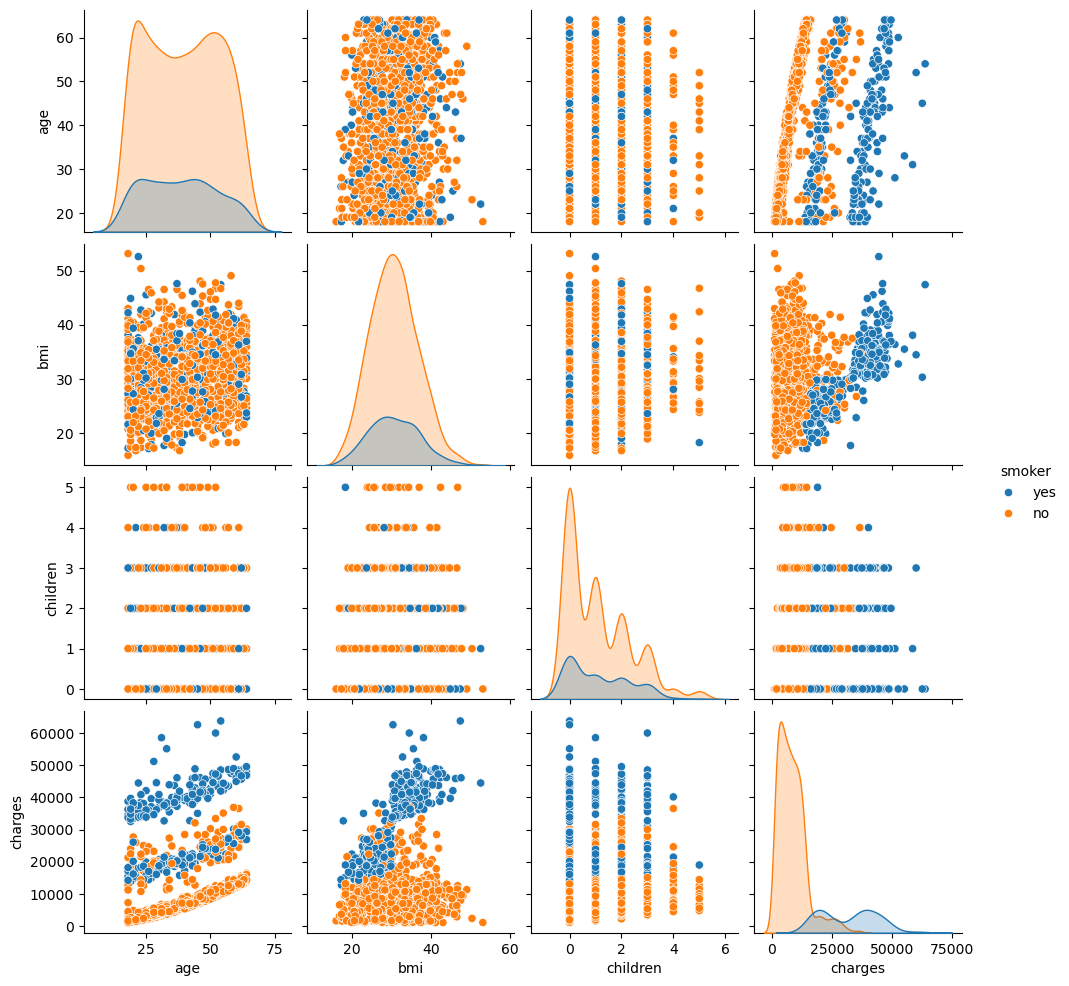

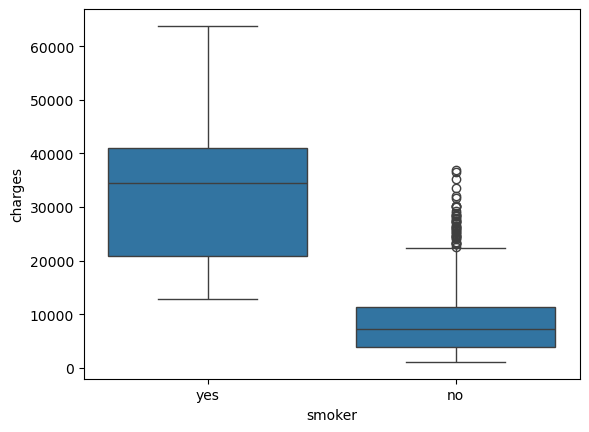

In [3]:
# Step 2: EDA
sns.pairplot(df, hue='smoker')
plt.show()
sns.boxplot(x='smoker', y='charges', data=df)
plt.show()


In [4]:
# Step 3: Preprocessing
df = pd.get_dummies(df, drop_first=True)

In [5]:
# Step 4: Feature Engineering
df['age_smoker'] = df['age'] * df['smoker_yes']
df['bmi_smoker'] = df['bmi'] * df['smoker_yes']

In [6]:
# Step 5: Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [7]:
X = df.drop('charges', axis=1)
y = df['charges']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [10]:
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
print("R²:", r2_score(y_test, y_pred))

RMSE: 4574.123734451316
R²: 0.865231697953168


/opt/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [11]:
# Step 6: Save Model
import joblib
joblib.dump(model, "insurance_model.pkl")

['insurance_model.pkl']

In [13]:
# Step 7: Streamlit App (app.py)
# Save the below code in a file called app.py

import streamlit as st
import numpy as np
import joblib

In [14]:
model = joblib.load("insurance_model.pkl")

In [15]:
st.title("Medical Insurance Cost Estimator")


2025-07-16 17:00:23.261 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:00:23.363 
  command:

    streamlit run /opt/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-07-16 17:00:23.364 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [16]:
age = st.slider("Age", 18, 65)
sex = st.selectbox("Sex", ["male", "female"])
bmi = st.slider("BMI", 15.0, 45.0)
children = st.slider("Children", 0, 5)
smoker = st.selectbox("Smoker", ["yes", "no"])
region = st.selectbox("Region", ["southeast", "southwest", "northeast", "northwest"])

2025-07-16 17:01:07.344 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:01:07.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:01:07.347 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:01:07.347 Session state does not function when running a script without `streamlit run`
2025-07-16 17:01:07.348 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:01:07.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:01:07.350 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:01:07.351 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-16 17:01